Name: Shreeya Chitnis 
Library: NLTK
URL: https://github.com/shreeyachitnis/NLTK
Description: NLTK, short for Natural Language Toolkit, is a comprehensive Python library designed to facilitate the exploration, processing, and analysis of human language data.



In [2]:
import string

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [2]:
# Load the dataset of customer reviews
df = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv')

In [3]:
# Drop rows with missing values in the 'Review Text' column
df.dropna(subset=['Review Text'], inplace=True)

In [7]:
# Reduce the length of the dataset as it takes a lot of time to process 
df = df.iloc[:len(df)//2]

In [4]:
# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text and lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    return tokens

In [8]:
# Apply preprocessing to the 'review' column
df['tokens'] = df['Review Text'].apply(preprocess_text)

In [9]:
sid = SentimentIntensityAnalyzer()
# Perform sentiment analysis using NLTK's VADER
df['sentiment_score'] = df['tokens'].apply(lambda tokens: sid.polarity_scores(' '.join(tokens))['compound'])



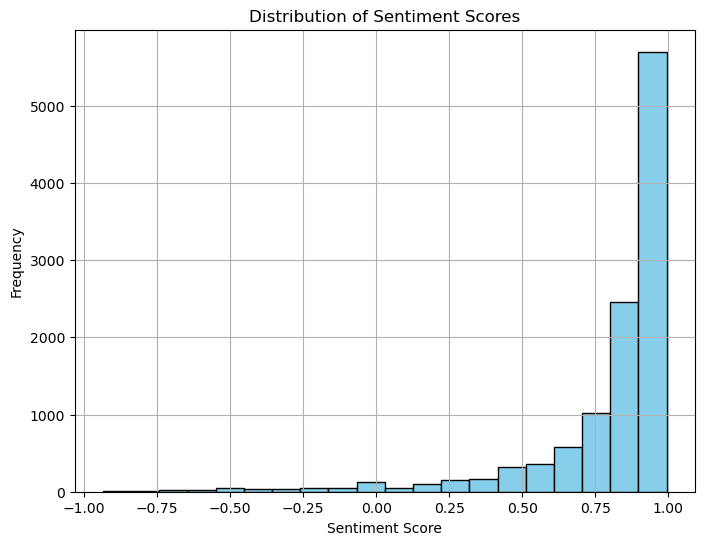

In [10]:
# Plot the distribution for Sentiment Scores  
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Extract key insights from the text data
def extract_insights(tokens):
    # Calculate word frequencies
    fdist = FreqDist(tokens)
    
    # Get the most common words
    most_common_words = fdist.most_common(10)
    
    return most_common_words

In [12]:
# Apply insights extraction to the 'tokens' column
df['insights'] = df['tokens'].apply(extract_insights)

In [13]:
print("\nKey Insights:")
for idx, row in df.iterrows():
    print(f"Review {idx + 1}:")
    print(row['insights'])
    print()


Key Insights:
Review 1:
[('absolutely', 1), ('wonderful', 1), ('silky', 1), ('sexy', 1), ('comfortable', 1)]

Review 2:
[('petite', 3), ('love', 2), ('bc', 2), ('would', 2), ('dress', 1), ('sooo', 1), ('pretty', 1), ('happened', 1), ('find', 1), ('store', 1)]

Review 3:
[('small', 3), ('petite', 2), ('half', 2), ('layer', 2), ('net', 2), ('high', 1), ('hopes', 1), ('dress', 1), ('really', 1), ('wanted', 1)]

Review 4:
[('love', 3), ('jumpsuit', 1), ('fun', 1), ('flirty', 1), ('fabulous', 1), ('every', 1), ('time', 1), ('wear', 1), ('get', 1), ('nothing', 1)]

Review 5:
[('shirt', 2), ('flattering', 1), ('due', 1), ('adjustable', 1), ('front', 1), ('tie', 1), ('perfect', 1), ('length', 1), ('wear', 1), ('leggings', 1)]

Review 6:
[('dress', 3), ('love', 2), ('skirt', 2), ('tracy', 1), ('reese', 1), ('dresses', 1), ('one', 1), ('petite', 1), ('5', 1), ('feet', 1)]

Review 7:
[('hte', 4), ('color', 2), ('trying', 2), ('aded', 1), ('basket', 1), ('last', 1), ('mintue', 1), ('see', 1), ('w

[('size', 2), ('swimsuit', 1), ('aaaahmazing', 1), ('seafolly', 1), ('australian', 1), ('brand', 1), ('sizing', 1), ('way', 1), ('luckily', 1), ('already', 1)]

Review 1980:
[('wear', 2), ('xs', 2), ('typically', 1), ('tops', 1), ('purchased', 1), ('less', 1), ('flowy', 1), ('fit', 1), ('top', 1), ('luxurious', 1)]

Review 1981:
[('great', 1), ('piece', 1), ('wish', 1), ('fit', 1), ('bit', 1), ('blousy', 1), ('rather', 1), ('cami', 1)]

Review 1982:
[('top', 2), ('great', 2), ('away', 2), ('simple', 1), ('time', 1), ('run', 1), ('large', 1), ('skinny', 1), ('girl', 1), ('style', 1)]

Review 1983:
[('color', 1), ('style', 1), ('adjustability', 1), ('easy', 1), ('fit', 1), ('flattering', 1), ('yes', 1), ('many', 1), ('levels', 1), ('oh', 1)]

Review 1984:
[('sweater', 2), ('little', 2), ('lovely', 1), ('unexpected', 1), ('things', 1), ('keep', 1), ('knit', 1), ('details', 1), ('pictures', 1), ('justice', 1)]

Review 1985:
[('skirt', 2), ('size', 2), ('either', 2), ('adorable', 1), ('frus

[('fits', 2), ('jumpsuit', 1), ('pretty', 1), ('perfectly', 1), ('5', 1), ('2', 1), ('102', 1), ('lbs', 1), ('32c', 1), ('got', 1)]

Review 3675:
[('weather', 2), ('looks', 2), ('wish', 1), ('cooler', 1), ('california', 1), ('could', 1), ('wear', 1), ('often', 1), ('bought', 1), ('sale', 1)]

Review 3676:
[('top', 1), ('beautiful', 1), ('drapes', 1), ('like', 1), ('picture', 1), ('gorgeous', 1), ('details', 1), ('back', 1), ('expect', 1), ('retailer', 1)]

Review 3677:
[('always', 1), ('go', 1), ('black', 1), ('deviated', 1), ('time', 1), ('glad', 1), ('quality', 1), ('fabric', 1), ('sheer', 1), ('great', 1)]

Review 3678:
[('got', 2), ('tee', 1), ('great', 1), ('price', 1), ('online', 1), ('like', 1), ('lot', 1), ('medium', 1), ('might', 1), ('liked', 1)]

Review 3679:
[('great', 1), ('skinny', 1), ('jean', 1), ('grey', 1), ('beauties', 1), ('flattering', 1), ('light', 1), ('weight', 1), ('fit', 1), ('true', 1)]

Review 3681:
[('great', 2), ('fit', 1), ('cute', 1), ('design', 1), ('go

Review 4865:
[('like', 3), ('shirt', 2), ('design', 2), ('front', 2), ('really', 1), ('colors', 1), ('good', 1), ('ordered', 1), ('black', 1), ('one', 1)]

Review 4866:
[('got', 1), ('tons', 1), ('complements', 1), ('work', 1), ('many', 1), ('seasons', 1), ('throw', 1), ('cardigan', 1), ('fall', 1), ('little', 1)]

Review 4868:
[('love', 2), ('wear', 2), ('solid', 2), ('colors', 2), ('top', 1), ('feminine', 1), ('cute', 1), ('skinny', 1), ('jeans', 1), ('tall', 1)]

Review 4869:
[('love', 2), ('item', 2), ('wonderful', 1), ('find', 1), ('yes', 1), ('runs', 1), ('big', 1), ('beautiful', 1), ('quality', 1), ('design', 1)]

Review 4870:
[('bust', 2), ('able', 1), ('purchase', 1), ('item', 1), ('could', 1), ('get', 1), ('size', 1), ('right', 1), ('small', 1), ('puckered', 1)]

Review 4871:
[('got', 2), ('shirt', 2), ('mail', 1), ('absolutely', 1), ('love', 1), ('paired', 1), ('jeans', 1), ('brown', 1), ('boots', 1), ('many', 1)]

Review 4872:
[('dress', 1), ('runs', 1), ('big', 1), ('size'

Review 5978:
[('color', 4), ('great', 3), ('perfect', 3), ('love', 2), ('pink', 2), ('top', 1), ('bright', 1), ('light', 1), ('pretty', 1), ('spring', 1)]

Review 5979:
[('top', 2), ('small', 2), ('pattern', 1), ('fabric', 1), ('nice', 1), ('usually', 1), ('dresses', 1), ('narrow', 1), ('across', 1), ('chest', 1)]

Review 5980:
[('perfect', 1), ('casual', 1), ('pair', 1), ('jns', 1), ('shorts', 1), ('spring', 1)]

Review 5981:
[('bought', 4), ('perfect', 2), ('small', 2), ('6', 2), ('local', 1), ('retailer', 1), ('store', 1), ('last', 1), ('one', 1), ('walked', 1)]

Review 5982:
[('like', 2), ('nice', 1), ('colors', 1), ('rather', 1), ('solid', 1), ('top', 1), ('actually', 1), ('bought', 1), ('pink', 1), ('also', 1)]

Review 5983:
[('top', 4), ('white', 2), ('beautiful', 1), ('fits', 1), ('true', 1), ('size', 1), ('4ft', 1), ('11inches', 1), ('114', 1), ('lbs', 1)]

Review 5984:
[('love', 1), ('tank', 1), ('colors', 1), ('great', 1), ('fit', 1), ('flattering', 1), ('fabric', 1), ('ligh

Review 7953:
[('tied', 2), ('love', 1), ('sweater', 1), ('wool', 1), ('soft', 1), ('itchy', 1), ('worn', 1), ('front', 1), ('shown', 1), ('back', 1)]

Review 7954:
[('really', 1), ('love', 1), ('sweater', 1), ('back', 1), ('color', 1), ('versatile', 1), ('compliment', 1), ('virtually', 1), ('anything', 1), ('tie', 1)]

Review 7955:
[('size', 1), ('dress', 1), ('great', 1), ('quality', 1), ('flattering', 1), ('tight', 1), ('arms', 1), ('chest', 1), ('ordered', 1), ('usual', 1)]

Review 7956:
[('blouse', 1), ('nice', 1), ('casual', 1), ('feel', 1), ('feminine', 1), ('lines', 1), ('swingy', 1), ('design', 1), ('flattering', 1)]

Review 7957:
[('like', 3), ('tried', 2), ('2', 2), ('fit', 2), ('felt', 2), ('ha', 2), ('super', 2), ('great', 1), ('white', 1), ('dress', 1)]

Review 7958:
[('top', 1), ('delicate', 1), ('feminine', 1), ('beautiful', 1), ('run', 1), ('small', 1), ('size', 1), ('usually', 1), ('buy', 1), ('stretch', 1)]

Review 7959:
[('beautiful', 1), ('serve', 1), ('sweater', 1)

Review 9286:
[('colors', 2), ('dress', 2), ('big', 2), ('patterns', 1), ('beautiful', 1), ('ends', 1), ('cheap', 1), ('flimsy', 1), ('polyester', 1), ('lining', 1)]

Review 9287:
[('love', 2), ('fabric', 1), ('c', 1), ('uses', 1), ('soft', 1), ('pliable', 1), ('fit', 1), ('tts', 1), ('room', 1), ('draping', 1)]

Review 9288:
[('xs', 2), ('cute', 1), ('dress', 1), ('5', 1), ('4', 1), ('120', 1), ('lbs', 1), ('regular', 1), ('long', 1), ('petite', 1)]

Review 9289:
[('sweater', 3), ('wear', 2), ('xl', 2), ('size', 2), ('cute', 1), ('plan', 1), ('wearing', 1), ('least', 1), ('fall', 1), ('love', 1)]

Review 9290:
[('one', 2), ('someone', 1), ('many', 1), ('cardigans', 1), ('favs', 1), ('collection', 1), ('dress', 1), ('really', 1), ('soft', 1), ('great', 1)]

Review 9291:
[('sleeves', 4), ('ruffle', 2), ('perfect', 2), ('2', 2), ('petite', 2), ('length', 2), ('fray', 1), ('fan', 1), ('dress', 1), ('modern', 1)]

Review 9292:
[('pretty', 3), ('tried', 2), ('bit', 2), ('size', 2), ('2', 2),

Review 10664:
[('dress', 1), ('fits', 1), ('like', 1), ('dream', 1), ('looks', 1), ('gorgeous', 1), ('sure', 1), ('go', 1), ('many', 1), ('occasions', 1)]

Review 10665:
[('would', 2), ('going', 2), ('really', 2), ('wedding', 2), ('high', 1), ('hopes', 1), ('reading', 1), ('reviews', 1), ('see', 1), ('dress', 1)]

Review 10666:
[('dress', 3), ('summer', 2), ('pockets', 2), ('cute', 1), ('runs', 1), ('bit', 1), ('large', 1), ('give', 1), ('shape', 1), ('good', 1)]

Review 10667:
[('lace', 2), ('dress', 1), ('amazing', 1), ('bought', 1), ('afternoon', 1), ('wedding', 1), ('attending', 1), ('perfect', 1), ('fits', 1), ('like', 1)]

Review 10668:
[('love', 3), ('dress', 1), ('absolutely', 1), ('gorgeous', 1), ('5', 1), ('2', 1), ('petite', 1), ('sizing', 1), ('perfect', 1)]

Review 10669:
[('dress', 2), ('4th', 1), ('byron', 1), ('lars', 1), ('love', 1), ('designer', 1), ('dresses', 1), ('fit', 1), ('far', 1), ('tell', 1)]

Review 10670:
[('dress', 4), ('size', 2), ('long', 2), ('ordered',

In [ ]:
#Example 2

In [3]:
# Load the dataset of movie reviews
df = pd.read_csv('data/movie.csv')

In [ ]:
df.head(2)

In [4]:
# Reduce the length of the dataset as it takes a lot of time to process 
df = df.iloc[:len(df)//8]

In [5]:
# Tokenization, Lowercasing, Removing Stopwords and Punctuation
stop_words = set(stopwords.words('english'))

df['preprocessed_text'] = df['text'].apply(lambda text: ' '.join([word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]))



In [6]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)

In [7]:
# Feature Extraction: TF-IDF Vectorization

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
# Train a classifier (e.g., Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_tfidf)

In [9]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       495
           1       0.86      0.78      0.82       505

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Accuracy: 0.827
